In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
import warnings

from common import data_load_home_credit, find_optimal_cutoff, plot_confusion_matrix, plot_auc

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train, test = data_load_home_credit('/media/ismaeel/Work/msds19029_thesis/dataset/home_with_missing.csv')

In [3]:
feats = [f for f in train.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
clf = CatBoostClassifier(
    iterations=876,
    random_seed=42,
    learning_rate=0.15461088645165447,
    custom_loss=['AUC', 'Accuracy'],
    od_type='Iter',
    metric_period = 5,
    od_wait=5,
    task_type = "GPU",
    bagging_temperature=0.6170793585023163,
    border_count=198,
    depth=4,
    l2_leaf_reg=19,
    random_strength=0.0030745042451505583,
    scale_pos_weight=0.42786176009119037
)

x = train[feats]
y = train['TARGET']

x_val = test[feats]
y_val = test['TARGET']

cat_features = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'WALLSMATERIAL_MODE']

clf.fit(
    x, y,
    cat_features=cat_features,
    eval_set=(x_val, y_val),
)

0:	learn: 0.4879165	test: 0.4879708	best: 0.4879708 (0)	total: 72.9ms	remaining: 1m 3s
5:	learn: 0.1920590	test: 0.1925990	best: 0.1925990 (5)	total: 390ms	remaining: 56.5s
10:	learn: 0.1606678	test: 0.1614573	best: 0.1614573 (10)	total: 696ms	remaining: 54.8s
15:	learn: 0.1495299	test: 0.1503086	best: 0.1503086 (15)	total: 1s	remaining: 54s
20:	learn: 0.1468741	test: 0.1477255	best: 0.1477255 (20)	total: 1.31s	remaining: 53.3s
25:	learn: 0.1455901	test: 0.1464703	best: 0.1464703 (25)	total: 1.62s	remaining: 52.9s
30:	learn: 0.1447537	test: 0.1456410	best: 0.1456410 (30)	total: 1.93s	remaining: 52.5s
35:	learn: 0.1441830	test: 0.1450278	best: 0.1450278 (35)	total: 2.23s	remaining: 52.1s
40:	learn: 0.1432062	test: 0.1440261	best: 0.1440261 (40)	total: 2.55s	remaining: 51.9s
45:	learn: 0.1426341	test: 0.1434694	best: 0.1434694 (45)	total: 2.87s	remaining: 51.7s
50:	learn: 0.1421666	test: 0.1429897	best: 0.1429897 (50)	total: 3.17s	remaining: 51.4s
55:	learn: 0.1418057	test: 0.1425399	bes

              precision    recall  f1-score   support

    Approved       0.97      0.71      0.82    220280
    Declined       0.18      0.71      0.29     19538

    accuracy                           0.71    239818
   macro avg       0.57      0.71      0.55    239818
weighted avg       0.90      0.71      0.78    239818

Binary: ROC AUC=0.713


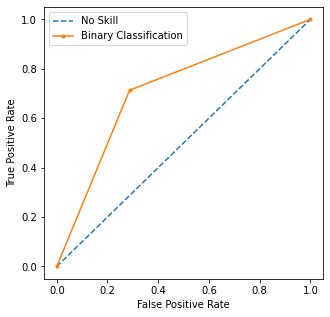

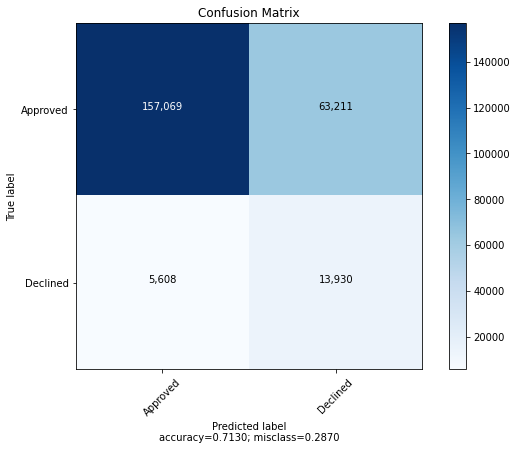

In [4]:
pred = clf.predict_proba(x)[:, 1]
labels = y
th = find_optimal_cutoff(labels, pred)
pred = np.where(pred > th, 1, 0)

cm = confusion_matrix(labels, pred)
cr = classification_report(labels, pred, target_names=['Approved', 'Declined'])
print(cr)

plot_auc(labels, pred)

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Approved', 'Declined'],
                      title        = "Confusion Matrix")

              precision    recall  f1-score   support

    Approved       0.97      0.71      0.82    220280
    Declined       0.18      0.71      0.29     19538

    accuracy                           0.71    239818
   macro avg       0.57      0.71      0.55    239818
weighted avg       0.90      0.71      0.78    239818

Binary: ROC AUC=0.713


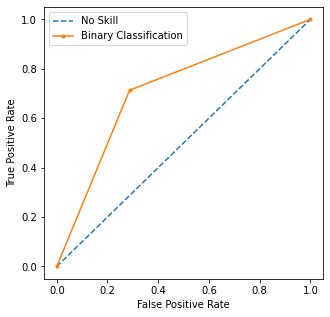

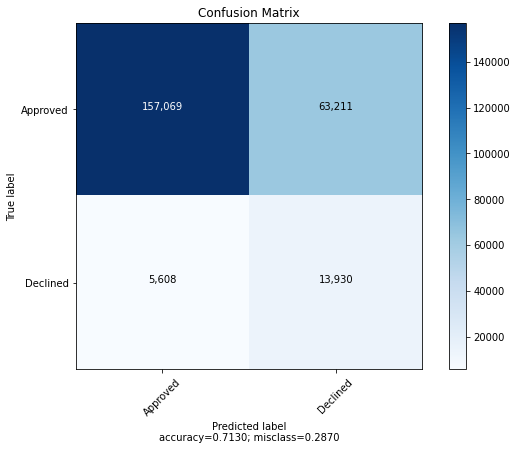

In [5]:
pred = clf.predict_proba(x)[:, 1]
labels = y
th = find_optimal_cutoff(labels, pred)
pred = np.where(pred > th, 1, 0)

cm = confusion_matrix(labels, pred)
cr = classification_report(labels, pred, target_names=['Approved', 'Declined'])
print(cr)

plot_auc(labels, pred)

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = ['Approved', 'Declined'],
                      title        = "Confusion Matrix")